# Ejercicio final del módulo 2

El punto de partida es la consideración de que existe un gran problema con la vivienda y el turismo de alquiler de AirBnb en ciudades. Vamos a trabajar con un `dataset` para analizar este problema. 

Se sabe que muchos propietarios privados encuentran más rentable y lucrativo alquilar pisos a turistas que a locales (especialmente en los centros de las ciudades), y muchas agencias inmobiliarias compran propiedades y las convierten también en alojamientos turísticos. Todo esto tiene como efecto reducir la oferta, aumentar los precios y empujar a los comercios locales a otros barrios, dejando solo a los turistas en el centro.

Con esto en mente, y sabiendo que Airbnb es hoy en día uno de los mercados en línea más populares para alojamiento, investigaremos los datos para:

- Por un lado evaluar el impacto que tiene Airbnb en la vivienda (en este caso se analiza la ciudad de Madrid).

- Por otro lado indagar sobre quién, cuándo y cómo se alquila y posiblemente hacer consideraciones sobre los flujos turísticos.

# Importar librerias

Pandas, numpy y seaborn

## Solución

In [1]:
# Importo librerías.
import numpy as np
import pandas as pd
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster

# Cargar los anuncios de AirBnb

## Solución

In [2]:
# Leo el dataset.
df = pd.read_csv("datos/airbnb_anuncios.csv")

In [3]:
# Muestro el dataset por pantalla.
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room with ensuite bathroom, Airc.",13660,Simon,Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,70,1,65,2019-09-04,0.56,1,53
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,17,4,33,2018-07-15,0.55,2,48
2,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,5,2,2017-07-03,0.03,1,354
3,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,64,2019-07-07,0.63,1,301
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38985,-3.69011,Private room,25,2,136,2019-07-10,1.19,1,337


# Vea el contenido del dataset y analice las columnas

No siempre tendremos una descripción de las columnas. Analícelas con los siguientes comandos: `shape`, `dtypes` e `info`.

## Solución

In [4]:
# Obtengo el tamaño del dataset.
df.shape

(20837, 16)

In [5]:
# Obtengo el tipo de dato de cada columna.
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
# Obtengo información general del dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20837 entries, 0 to 20836
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20837 non-null  int64  
 1   name                            20832 non-null  object 
 2   host_id                         20837 non-null  int64  
 3   host_name                       20822 non-null  object 
 4   neighbourhood_group             20837 non-null  object 
 5   neighbourhood                   20837 non-null  object 
 6   latitude                        20837 non-null  float64
 7   longitude                       20837 non-null  float64
 8   room_type                       20837 non-null  object 
 9   price                           20837 non-null  int64  
 10  minimum_nights                  20837 non-null  int64  
 11  number_of_reviews               20837 non-null  int64  
 12  last_review                     

# Valores duplicados

Analice  los valores duplicados por las columnas.

Use el comando `duplicated` junto con `sum`.

En esta ocasión quite los valores duplicados con `drop_duplicates`.

## Solución

In [7]:
# Obtengo valores duplicados.
df.duplicated().sum()

0

En este caso veo que no hay valores duplicados, por lo que no es necesario eliminar nada usando drop_duplicates.

# Compruebe los valores nulos

Para ello use `isnull` junto con `sum`.

## Solución

In [8]:
# Obtengo valores nulos.
df.isnull().sum()

id                                   0
name                                 5
host_id                              0
host_name                           15
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4654
reviews_per_month                 4654
calculated_host_listings_count       0
availability_365                     0
dtype: int64

# Limpieza de columnas

Elimine las columnas `nombre`, `id`, `host_name` y `last_review`.

## Solución

In [9]:
# Elimino las columnas sugeridas implementando un inplace para que se mantenga el cambio.
df.drop(["name","id","host_name","last_review"], axis = 1, inplace = True)

In [10]:
# Obtengo una lista de las columnas para comprabar que he hecho bien la eliminación.
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

# Análisis de los barrios

Analice la columna `neighbourhood_group` y contee los valores. Use el parámetro `normalize` con valores `True` o `False` para ver su utilidad.

Link de referencia: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html

## Solución

In [11]:
# Obtengo los valores de los diferentes distritos de Madrid y normalizo el conteo de los mismo.
df["neighbourhood_group"].value_counts(normalize = True)

Centro                   0.469021
Salamanca                0.065988
Chamberí                 0.063877
Arganzuela               0.053799
Tetuán                   0.040217
Carabanchel              0.032538
Retiro                   0.031914
Latina                   0.029563
Ciudad Lineal            0.029419
Puente de Vallecas       0.028363
Chamartín                0.026443
Moncloa - Aravaca        0.026011
San Blas - Canillejas    0.025148
Usera                    0.017325
Hortaleza                0.015933
Fuencarral - El Pardo    0.014397
Villaverde               0.007967
Barajas                  0.007919
Moratalaz                0.006095
Villa de Vallecas        0.004943
Vicálvaro                0.003119
Name: neighbourhood_group, dtype: float64

# Sección

Descripción `shape`, `dtypes` e `info`.

## Solución

In [12]:
df.shape

(20837, 12)

In [13]:
df.dtypes

host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20837 entries, 0 to 20836
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         20837 non-null  int64  
 1   neighbourhood_group             20837 non-null  object 
 2   neighbourhood                   20837 non-null  object 
 3   latitude                        20837 non-null  float64
 4   longitude                       20837 non-null  float64
 5   room_type                       20837 non-null  object 
 6   price                           20837 non-null  int64  
 7   minimum_nights                  20837 non-null  int64  
 8   number_of_reviews               20837 non-null  int64  
 9   reviews_per_month               16183 non-null  float64
 10  calculated_host_listings_count  20837 non-null  int64  
 11  availability_365                20837 non-null  int64  
dtypes: float64(3), int64(6), object(

# Tratamiento de la columna `reviews_per_month`

Ponga a 0 aquellos valores nulos de la columna con el comando `fillna`.

## Solución

In [15]:
# Sustituyo por cero los valores nulos de reviews_per_month e implemento un inplace para que se mantenga.
df["reviews_per_month"].fillna(0, inplace = True)

In [16]:
# Compruebo que no hay valores nulos.
df["reviews_per_month"].isnull().sum()

0

# Quite aquellos valores nulos de las columnas restantes


## Solución

In [17]:
# No quedan columnas con valores nulos, para comprobarlo uso un info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20837 entries, 0 to 20836
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         20837 non-null  int64  
 1   neighbourhood_group             20837 non-null  object 
 2   neighbourhood                   20837 non-null  object 
 3   latitude                        20837 non-null  float64
 4   longitude                       20837 non-null  float64
 5   room_type                       20837 non-null  object 
 6   price                           20837 non-null  int64  
 7   minimum_nights                  20837 non-null  int64  
 8   number_of_reviews               20837 non-null  int64  
 9   reviews_per_month               20837 non-null  float64
 10  calculated_host_listings_count  20837 non-null  int64  
 11  availability_365                20837 non-null  int64  
dtypes: float64(3), int64(6), object(

# Uee el comando `describe` para ver el estado de los datos



## Solución

In [18]:
# Uso un describe.
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.083700e+04,20837.000000,20837.000000,20837.000000,20837.000000,20837.000000,20837.000000,20837.000000,20837.000000
mean,1.014144e+08,40.420548,-3.694500,134.065364,4.373614,35.163891,1.521432,12.188559,155.097567
std,8.956078e+07,0.021881,0.027793,381.207575,20.428777,61.863053,1.916618,32.156130,133.746263
min,5.154000e+03,40.319480,-3.890940,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,2.232182e+07,40.409550,-3.707490,40.000000,1.000000,1.000000,0.070000,1.000000,17.000000
50%,7.574288e+07,40.418900,-3.701180,65.000000,2.000000,8.000000,0.750000,2.000000,123.000000
75%,1.719263e+08,40.429020,-3.689110,100.000000,3.000000,42.000000,2.360000,7.000000,300.000000
max,2.960847e+08,40.573990,-3.527660,9999.000000,1125.000000,594.000000,34.230000,231.000000,365.000000


# Analice la correlación de las variables

Use el comando `corr` y de Seaborn use `heatmap` para respresentarlo.

Importe la librería `matplotlib` para facilitar la representación de los futuros gráficos.

`import matplotlib.pyplot as plt`

 **¿Qué observa con las correlaciones?**

## Solución

In [19]:
# Importo librerías necesarias, entre ellas warnings para quitar los warnings.
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


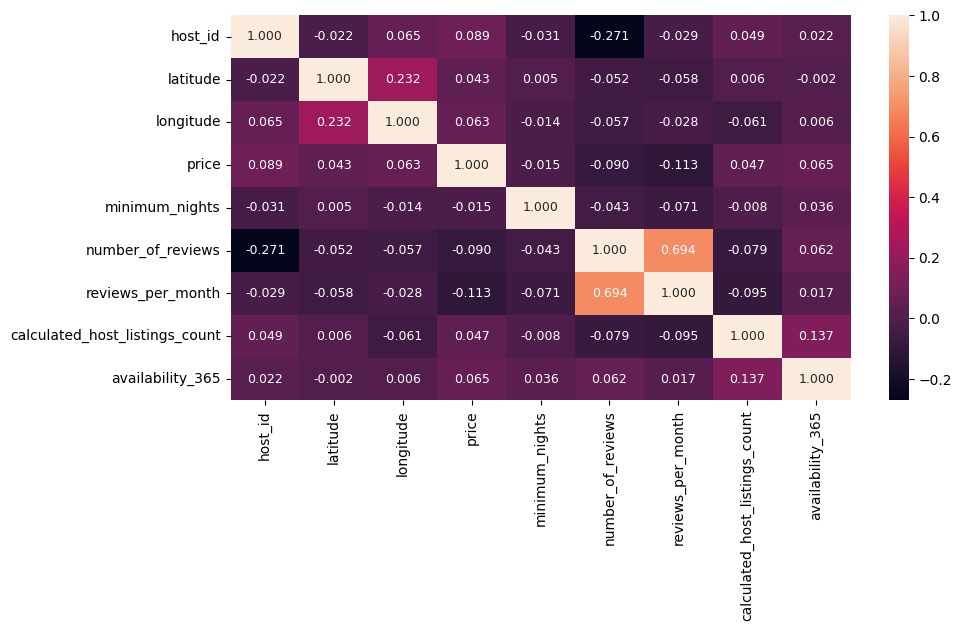

In [20]:
# Grafico la correlación.
columnas = df.columns
print(columnas)
fig = plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), square = False, annot = True, fmt = ".3f", annot_kws={"size":9});

Se observa que, al igual que ocurria con los datos de otras ciudades, no existe gran correlación entre ninguna variable con la exepción del número de reviews y las reviews por mes. Curiosamente, el precio no guarda especial correlación con nada.

# Identifique los barrios del dataset

Use el comando `unique` en la columna `neighbourhood_group`.

## Solución

In [21]:
# Obtengo el nombre de los diferentes distritos de Madrid.
df["neighbourhood_group"].unique()

array(['Chamartín', 'Latina', 'Centro', 'Arganzuela', 'Salamanca',
       'Tetuán', 'Fuencarral - El Pardo', 'Ciudad Lineal', 'Chamberí',
       'Villaverde', 'Hortaleza', 'Moncloa - Aravaca', 'Carabanchel',
       'Retiro', 'San Blas - Canillejas', 'Villa de Vallecas', 'Barajas',
       'Usera', 'Puente de Vallecas', 'Moratalaz', 'Vicálvaro'],
      dtype=object)

# Represente los barrios y su importancia

Use `countplot` de `Seaborn` en la columna `neighbourhood_group`.

## Solución

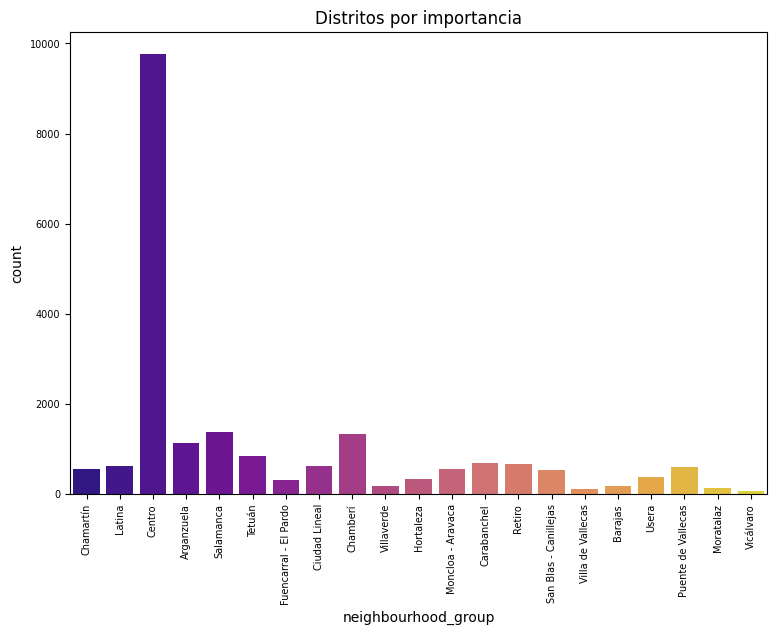

In [22]:
# Hago un gráfico de los diferentes distritos con su importancia.
plt.figure(figsize=(9,6))
sns.countplot(data = df, x = "neighbourhood_group", palette = "plasma")
plt.title("Distritos por importancia")
plt.xticks(rotation = 90, size = 7)
plt.yticks(size = 7);

# Realice ahora una representación de los barrios por separado y sin agrupar.

Use `countplot` de `Seaborn` en la columna `neighbourhood`.

## Solución

''

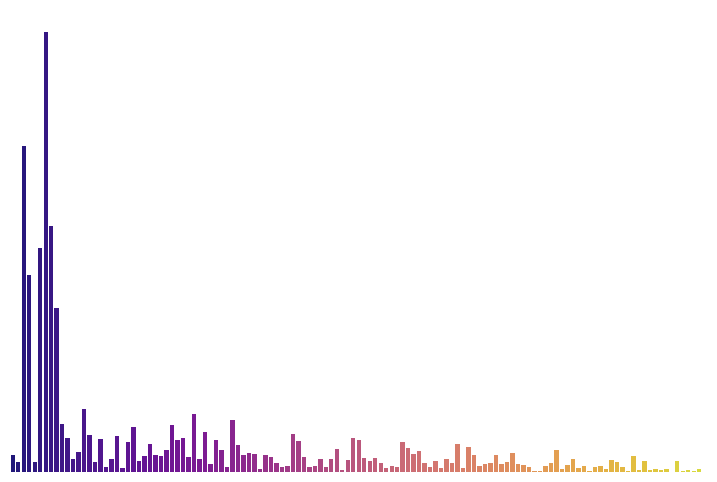

In [23]:
# Realizo un gráfico con los diferentes barrios y la cantidad de alojamientos.
plt.figure(figsize=(9,6))
sns.countplot(data = df, x = "neighbourhood", palette = "plasma")
plt.xticks(rotation = 90, size = 7)
plt.ylabel(None)
plt.yticks([])
plt.xlabel(None)
plt.xticks([])
sns.despine(left=True, right=True, bottom=True, top=True)
;

# Represente los tipos de habitación que se ofertan

Use la columna `room_type`.

## Solución

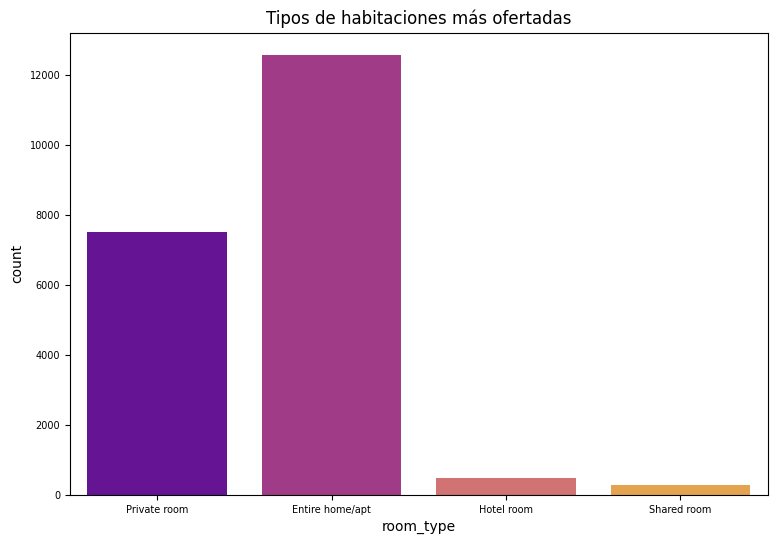

In [24]:
# Realizo un gráfico con los diferentes tipos de habitación.
plt.figure(figsize=(9,6))
sns.countplot(data = df, x = "room_type", palette = "plasma")
plt.title("Tipos de habitaciones más ofertadas")
plt.xticks( size = 7)
plt.yticks(size = 7);

# Relación entre la columna `neighbour_group` y `availability_365` que corresponde a la disponiblidad

Puede usar un `boxplot` de `sns`.
**¿Qué interpreta?**

## Solución

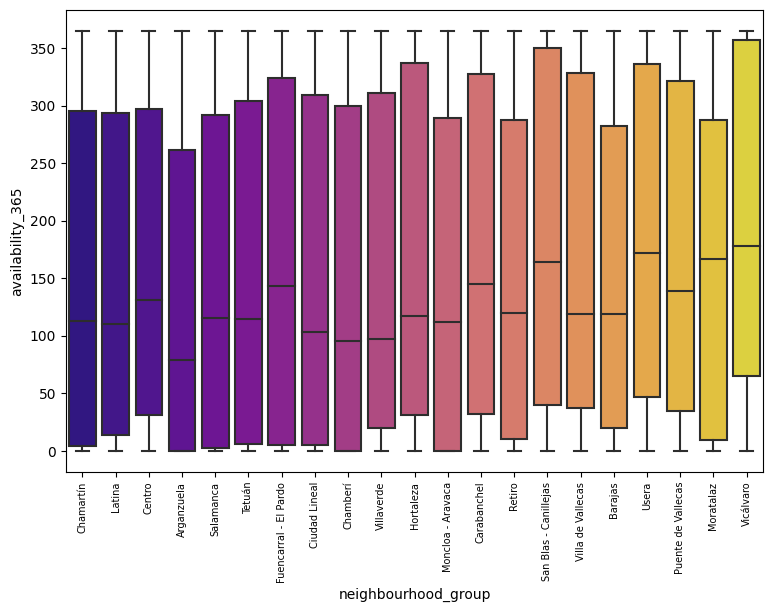

In [25]:
# Realizo un gráfico que relaciona los distritos con la disponibilidad temporal.
plt.figure(figsize=(9,6))
sns.boxplot(data = df, x = "neighbourhood_group", y = "availability_365", palette = "plasma")
plt.xticks(rotation = 90, size = 7);

En este gráfico podemos observar la disponibilidad media por distrito. El rango intercuartílico q3-q1, es decir, el 50% de la disponibilidad diaria anual está comprendida dentro de la caja. Los bigotes indican la variabilidad fuera de los cuartiles superior e inferior, que puede ir desde 0 dias al año, hasta 65.

# Relicemos un mapa de los grupos de barrios

Use un `scatterplot` de `sns`.

Para ello deberá aportar las columnas `longitude`, `latitude` y como `hue` aporte la columna `neighbourhood_group`.

Link de referencia: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

## Solución

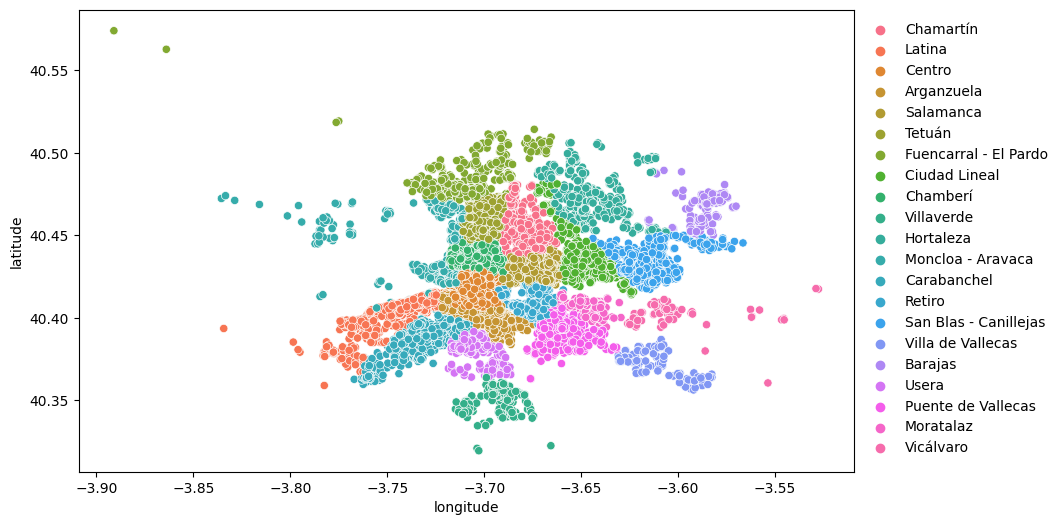

In [26]:
# Realizo un mapa de distritos aprovechando las columnas de longitud y latitud.
plt.figure(figsize=(10,6))
fig = sns.scatterplot(data = df, x = "longitude", y = "latitude", hue = "neighbourhood_group")
sns.move_legend(fig, "best", bbox_to_anchor=(1, 1), title= None, frameon= False);

# Realice el mapa anterior pero esta vez de los barrios

Siguiendo el comando anterior, use la columna `neighbourhood`.

## Solución

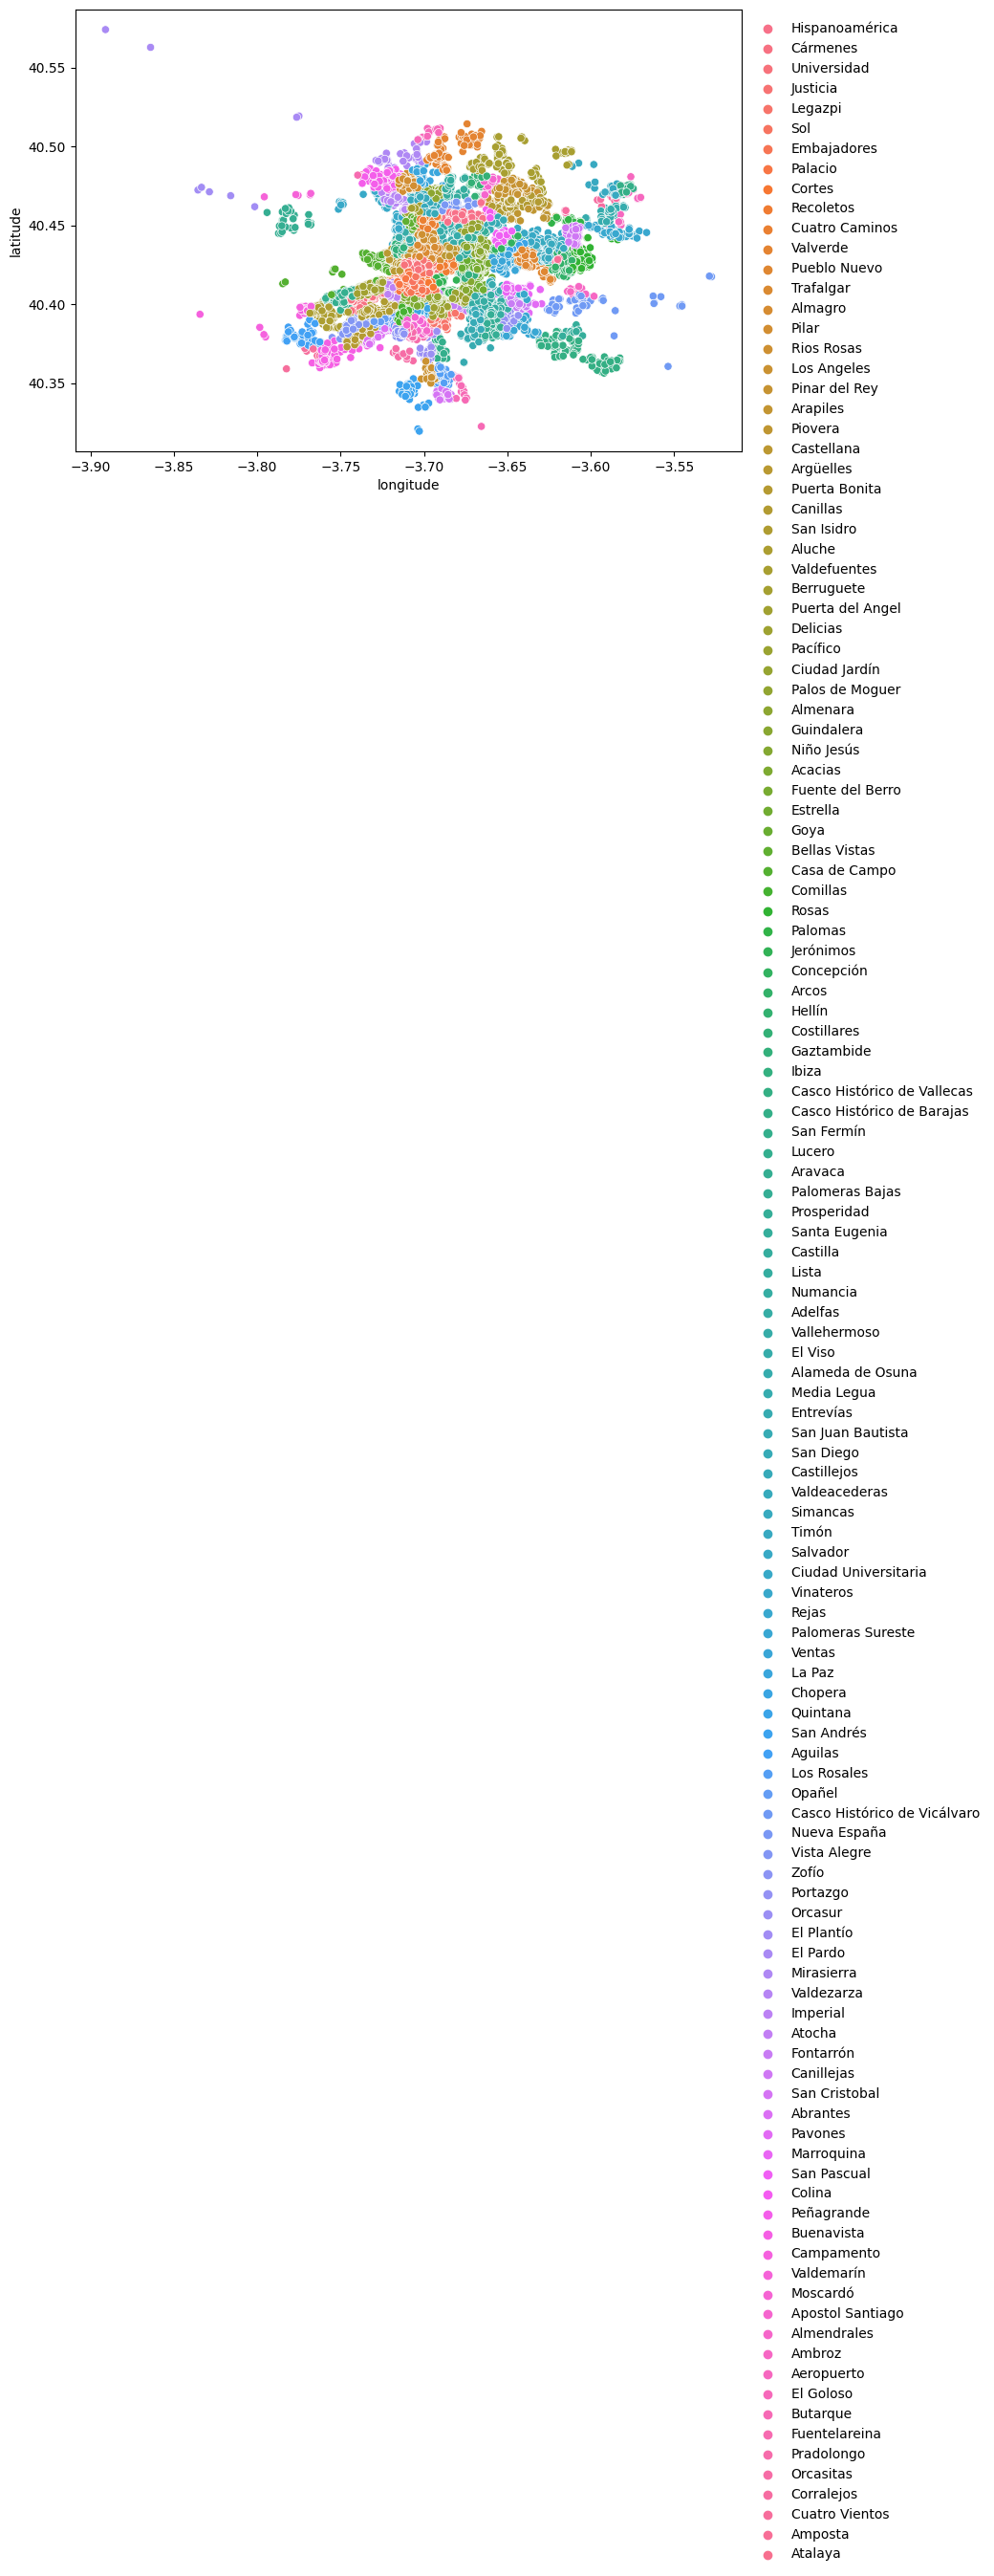

In [27]:
# Realizo un mapa con los barrios.
plt.figure(figsize=(9,6))
fig1 = sns.scatterplot(data = df, x = "longitude", y = "latitude", hue = "neighbourhood")
sns.move_legend(fig1, "best", bbox_to_anchor=(1, 1), title= None, frameon= False);

# Cree un mapa sobre el tipo de habitación por barrios

Esta vez, use la columna `room_type`.

**¿Qué indica el gráfico?**

## Solución

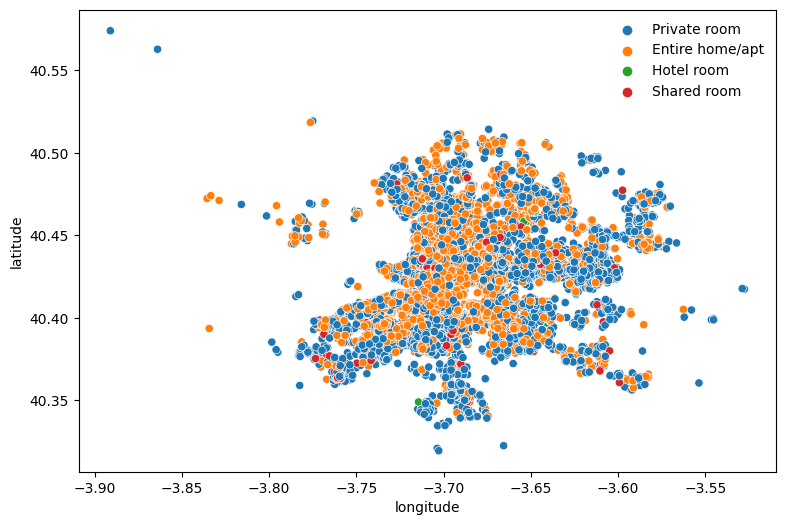

In [28]:
# Realizo un mapa con la localización de los diferentes tipos de alojamientos.
plt.figure(figsize=(9,6))
fig2 = sns.scatterplot(data = df, x = "longitude", y = "latitude", hue = "room_type")
sns.move_legend(fig2, "best", bbox_to_anchor=(1, 1), title= None, frameon= False);

El mapa indica la localización geográfica de los diferentes tipos de alojamientos. Se observa como apenas hay habitaciones de hotel y muy pocas habitaciones compartidas. Predominan habitaciones privadas y casas o apartamentos enteros.

# Disponibilidad de las habitaciones

Cree un mapa para ver la disponibilidad de las habitaciones. 

Para ello use la columna `availability_365`.

## Solución

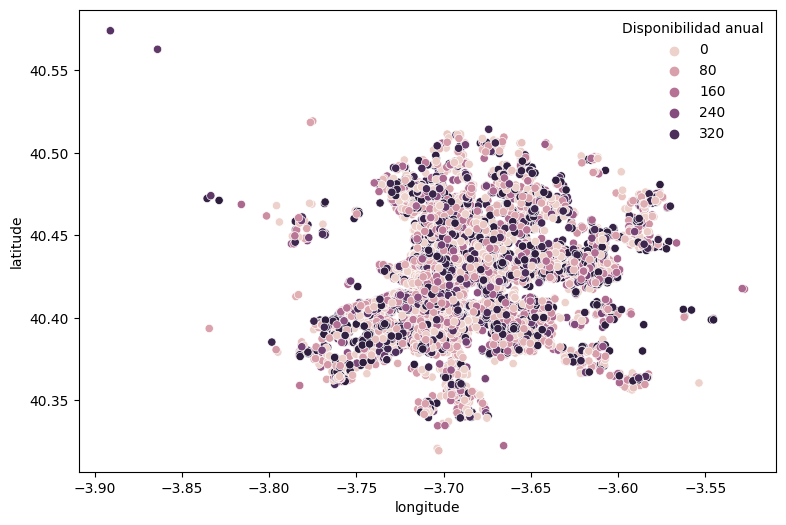

In [29]:
# Creo un mapa para visualizar la disponibilidad de las habitaciones.
plt.figure(figsize=(9,6))
fig1 = sns.scatterplot(data = df, x = "longitude", y = "latitude", hue = "availability_365")
sns.move_legend(fig1, "best", bbox_to_anchor=(1, 1), title= "Disponibilidad anual", frameon= False);

In [30]:
lats = df['latitude']
lons = df['longitude']
locations = list(zip(lats, lons))

map1 = folium.Map(location=[40.30, -3.40], zoom_start=9)
FastMarkerCluster(data=locations).add_to(map1)
map1